1. <a href="#load"> loading data </a>

2. <a href="#fpre"> feature preprocessing and generation</a>

    * <a href="#num"> numerical features </a>
        * <a href="#minmax"> minmax scaler </a>
        * <a href="#stds"> standard scaler </a>
        * <a href="#outl"> outlier </a>
        * <a href="#rank"> rank transformation </a>
        * <a href="#log"> log transformation </a>
        * <a href="#featgen"> feature generation </a>
        * <a href="#sumup"> conclusions </a>
        <br>
        <br>

    * <a href="#cat"> categorical/ordinal features </a>
        * <a href="#lab"> label encoder </a>
        * <a href="#freq"> frequency encoder </a>
        * <a href="#ohe"> one hot encoder </a>
        * <a href="#featgen2"> feature generation </a>
        * <a href="#sumup2"> conclusions </a>
        <br>
        <br>
    * <a href="#dt"> datetime features </a>
    * <a href="#coord"> coordinates features </a>
    * <a href="#miss"> missing value </a>

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from scipy.stats import rankdata

<a id="load"></a>
# 1. loading data

In [141]:
df = pd.read_csv("./dataset/titanic/train.csv")

In [139]:
df.shape

(891, 12)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see different types of features: binary, numeric, categorical, text, ID...

Why it is important to consider feature types?
- strong connection between preprocessing and model operation
- feature generation methods depends on feature types

<a id="fpre"></a>
# 2. feature preprocessing and generation

each type of feature has a proper way to be preprocessed, and the way features are preprocessed depends on the model that you will use.

e.g. RandomForest can deal with nonlinear relations, but linear models don't.

<br>
<br>

Besides that, feature generation can also be really helpful for model results.

e.g. extract week day from date, extract fractional part from prices.

<br>
<br>

<a id="num"></a>

### - numerical features

* scale preprocessing
    * tree-based models (Random Forests, Decision Tree)
    * non-tree-based models (k nearest neighbour, linear models, neural networks)

<a id="minmax"></a>

#### 1) to [0,1]

sklearn.preprocessing.MinMaxScaler

X = (X - X.min()) / (X.max() - X.min())

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>]], dtype=object)

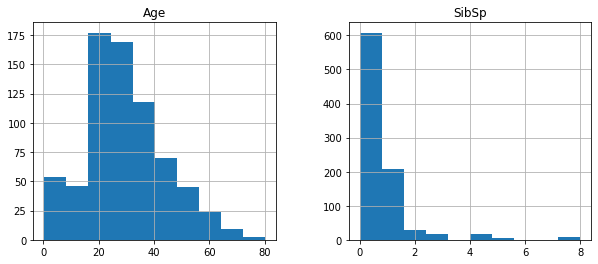

In [27]:
df[['Age', 'SibSp']].hist(figsize=(10,4))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

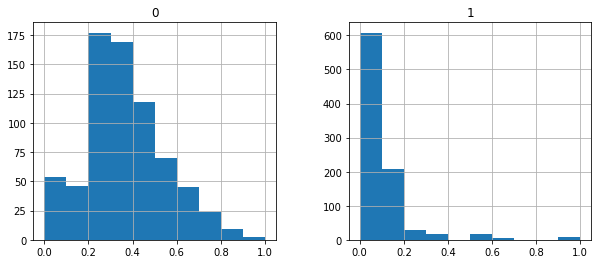

In [34]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(df[['Age', 'SibSp']])
pd.DataFrame(xtrain).hist(figsize=(10,4))

<a id="stds"></a>

#### 2) to mean=0, std=1

sklearn.preprocessing.StandardScaler

X = (X - X.mean()) / X.std()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>]], dtype=object)

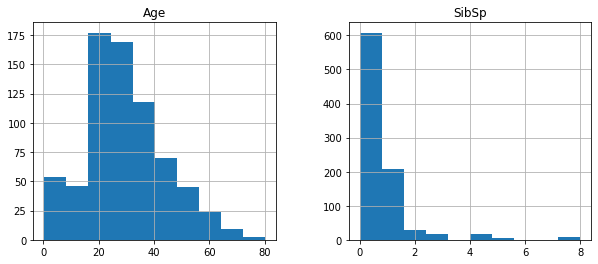

In [39]:
df[['Age', 'SibSp']].hist(figsize=(10,4))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

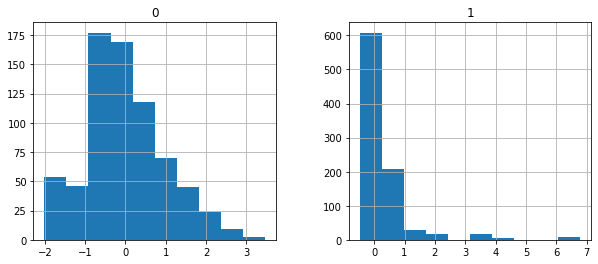

In [38]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(df[['Age', 'SibSp']])
pd.DataFrame(xtrain).hist(figsize=(10,4))

<a id="outl"></a>

#### 3) outlier identification

    - winsorizing: replace outlier by min or max according to percentile
    - trimming: eliminates outliers

In [123]:
from scipy.stats.mstats import winsorize

a = np.array([10,10,20,15,11,11,12,14,13,4,9,8,5,3,7,2,1,1,2,4,3,1,2,3,6,7,3,2,150])

b = np.array(winsorize(a, limits=[0.1, 0.1]))

In [124]:
print(f"{a} - {np.mean(a)}")
print(f"{b} - {np.mean(b)}")

[ 10  10  20  15  11  11  12  14  13   4   9   8   5   3   7   2   1   1
   2   4   3   1   2   3   6   7   3   2 150] - 11.689655172413794
[10 10 15 15 11 11 12 14 13  4  9  8  5  3  7  2  1  1  2  4  3  1  2  3
  6  7  3  2 15] - 6.862068965517241


<AxesSubplot:>

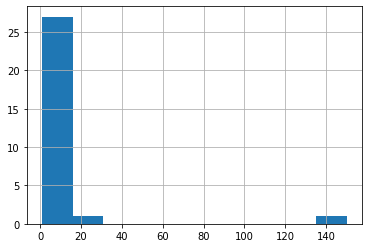

In [125]:
pd.Series(a).hist()

<AxesSubplot:>

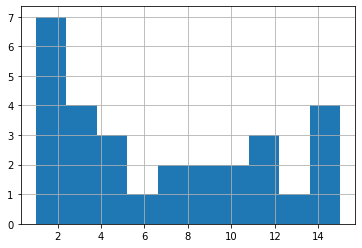

In [126]:
pd.Series(b).hist()

<a id="rank"></a>

#### 4) rank transformation

    spaces between sorted values equal
    (it moves outliers close to other objects!)
    
    scipy.stats.rankdata
    
    good for linear, knn, neural networks...

In [129]:
rankdata([-100,0,1e5])

array([1., 2., 3.])

In [130]:
rankdata([1000,1,10])

array([3., 1., 2.])

<a id="log"></a>

#### 5) log transform

drives big values closer to feature average --> values near zero becomes more distinguishable

can significantly improve neural network results!

numpy log

In [133]:
np.log([1,2,3,6])

array([0.        , 0.69314718, 1.09861229, 1.79175947])

<a id="featgen"></a>

#### 6) feature generation

    Main drivers:
        
    * prior knowledge, logic
    * EDA (create and check hypothesis)

prior knowledge/logic examples:
    
    * house prices:
        - house area, price --> price per area
        
    * horizontal distance, vertical distance --> direct distance
    
    * price --> fractional part (gather human perception on price)

<a id="sumup"></a>

#### Conclusions
    
    1) most often used preprocessing strategies
        a) MinMaxScaler - to [0,1]
        b) StandardScaler - to mean=0 std=1
        c) rank - equal spaces between sorted values
        d) log transform - near zero values more distinguishable
    
    
    2) scaling and rank for numeric features impact
        a) low for tree-based models
        b) high for non-tree-based models


    3) feature generation can make models more easy (less trees)

<a id="cat"></a>

### - categorical/ordinal features

categorical features in Titanic dataset:

    * Sex
    * Cabin
    * Embarked
    
ordinal feature (ordered categorical feature):

    * Pclass

<a id="lab"></a>
#### 1) Label encoder

map unique values to different numbers

- very usefull for tree-based methods, as they can split features and extract more usefull values in categories on its own

- non tree-based (linear, kNN, NN) can't use this feature very well

<br>

methods:

sklearn.preprocessing.LabelEncoder --> alphabetical

pandas.factorize --> respect order of appearance

In [161]:
emb = df.Embarked
emb

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [162]:
le = LabelEncoder()
le.fit_transform(emb)

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [163]:
pd.factorize(emb)

(array([ 0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  1,  0,  0,  2,  0,  0,  0,  1,  0,  2,  0,  1,  1,  2,  0,
         1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  2,  0,  2,  2,  1,  0,  0,
         0,  1,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  0,  1,  1,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  1,  0,  2,  0,  1,
         0,  0,  0,  1,  0,  0,  1,  2,  0,  1,  0,  1,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,
         0,  2,  0,  0,  0,  0,  0,  1,  1,  2,  0,  2,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  2,  1,  0,  0,  1,  0,  0,
         0, 

<a id="freq"></a>

#### 2) Frequency encoder

map unique values to their frequencies different numbers

can help both tree and non-tree models, but it is specially useful for non-tree-based models: for example, if frequency of category is correlated with target value, linear models will take advantage from this dependency.

For tree-based, it can help with less number of splits.

DRAWBACK: more than one feature with same frequency --> indistinguishable features

for this, _scipy.stats.rankdata_ to the rescue.

In [170]:
# count occurence oh each category

enc = df.groupby('Embarked').size()
enc

Embarked
C    168
Q     77
S    644
dtype: int64

In [176]:
# get percentage of each category

encoding = enc / len(df)
encoding

Embarked
C    0.188552
Q    0.086420
S    0.722783
dtype: float64

In [177]:
# map each category to its frequency

df.Embarked.map(encoding)

0      0.722783
1      0.188552
2      0.722783
3      0.722783
4      0.722783
         ...   
886    0.722783
887    0.722783
888    0.722783
889    0.188552
890    0.086420
Name: Embarked, Length: 891, dtype: float64

<a id="ohe"></a>

#### 3) One-hot encoder

Generates a new binary column for each unique category.

<br>

methods:

sklearn.preprocessing.OneHotEncoder

pandas.get_dummies

In [198]:
clas = df['Pclass']
clas

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [199]:
pd.get_dummies(clas)

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [211]:
ohe = OneHotEncoder()
ohe.fit_transform(df[['Pclass']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

<a id="featgen2"></a>

#### 4) Feature generation


One of the most usefull (at least for non-tree-based models) feature generation --> feature interaction between categorical features

Titanic Example: 

    - suppose target feature depends on PClass and sex feature
    - so, model could adjust predictions to the combination of them
    - strategy: CONCATENATE the features and then ONE HOT ENCODE

<a id="sumup2"></a>

#### Conclusions
    
    1) ordinal features are sorted in a meaningful order
    
    2) label encoder maps categories to numbers
    
    3) frequency encoder maps categories to its frequencies
    
    4) label and frequency enconder are often used for tree-based models
    
    5) one hot encoding is often used for non-tree-based models
    
    6) interaction of categorical features can help non-tree-based models

<a id="dt"></a>
### - datetime features

usual feature generation strategies:

1) to capture repetitive patterns:
    * day number in week, month, year, second, minute, hour
    
    <br>
    
2) to capture time passed from an event (time since):
    * number of days passed from a holiday
    * number of days remaining for next holliday

<a id="coord"></a>
### - coordinates features

usual feature generation strategies:

1) calculate distances to interesting places in the map (subway station, schools, hospital, infrastuctural buildings, tourist spot).

2) aggregated statistics for surrounding area (number of schools)


3) apply some rotation to the coordinates, in order to make easy for the model to converge

<a id="miss"></a>

### - missing value